# ST311 Homework 1 (Coding part)

Candidate number: 33349

# Week 2

## Q1 Ndarray
1. Generate vector $X = (0,2,4,6,\dots,22)$ and reshape it to a $3$-dimensional tensor `Y` with shape $(3,2,2).$ Print `Y` out. 
1. From the output, we see that `Y` has $3$ channels with each channel as a $2 \times 2$ matrix. Calculate three channel-sums and print the result out. 
1. Divide `Y` by the channel-sums with **broadcasting.**

In [6]:
import torch

#1
X = torch.arange(0, 24, 2)
Y = X.reshape(3, 2, 2)
print("Tensor Y: \n {}".format(Y))

#2
channel_1 = Y.sum(axis=0)
print("Sum over channel 1: \n {}".format(channel_1))
channel_2 = Y.sum(axis=1)
print("Sum over channel 2: \n {}".format(channel_2))
channel_3 = Y.sum(axis=2)
print("Sum over channel 3: \n {}".format(channel_3))

#3
print("Y divided by sum over channel 1: \n {}".format(Y/channel_1))
Y = Y.reshape(2, 3, 2)
print("Y divided by sum over channel 2: \n {}".format(Y/channel_2))
print("Y divided by sum over channel 3: \n {}".format(Y/channel_3))


Tensor Y: 
 tensor([[[ 0,  2],
         [ 4,  6]],

        [[ 8, 10],
         [12, 14]],

        [[16, 18],
         [20, 22]]])
Sum over channel 1: 
 tensor([[24, 30],
        [36, 42]])
Sum over channel 2: 
 tensor([[ 4,  8],
        [20, 24],
        [36, 40]])
Sum over channel 3: 
 tensor([[ 2, 10],
        [18, 26],
        [34, 42]])
Y divided by sum over channel 1: 
 tensor([[[0.0000, 0.0667],
         [0.1111, 0.1429]],

        [[0.3333, 0.3333],
         [0.3333, 0.3333]],

        [[0.6667, 0.6000],
         [0.5556, 0.5238]]])
Y divided by sum over channel 2: 
 tensor([[[0.0000, 0.2500],
         [0.2000, 0.2500],
         [0.2222, 0.2500]],

        [[3.0000, 1.7500],
         [0.8000, 0.7500],
         [0.5556, 0.5500]]])
Y divided by sum over channel 3: 
 tensor([[[0.0000, 0.2000],
         [0.2222, 0.2308],
         [0.2353, 0.2381]],

        [[6.0000, 1.4000],
         [0.8889, 0.6923],
         [0.5882, 0.5238]]])


## Q2 Linear Algebra
1. Generate tensor $ M $ of shape (2, 3, 4) whose elements are sampled from the stardard normal distribution. What is the output of `len(M)`?
1. Denote the first and second channel of $ M $  by $ M_1 $(`M1`) and $ M_2 $(`M2`), respectively. Check the shape of both `M1` and `M2`, and calculate $ M_1 \times M_2^\top $. Print all the results out. 
1. For a tensor $ M $ of arbitrary shape, does `len(M)` always correspond to the length of a certain axis of `M`? What is that axis?


In [7]:
#1
M = torch.normal(0, 1, size=(2, 3, 4))
print(" M tensor: \n {}".format(M))
print("length of M: \n {}".format(len(M)))

#2
M1 = M[0]
M2 = M[1]
print("shape of M1: \n {}".format(M1.shape))
print("shape of M2: ]\n {}".format(M1.shape))
print("M1 x M2^t: \n {}".format(torch.matmul(M1, torch.transpose(M2, 0, 1))))

 M tensor: 
 tensor([[[-1.2580,  0.6884, -1.0656, -2.1571],
         [ 0.8339,  0.7428,  0.2656,  0.2225],
         [ 1.0772,  0.0749, -1.1554, -0.4113]],

        [[-0.7421, -0.0038, -0.2792,  2.1754],
         [ 0.8281, -0.3554,  1.0809, -1.1114],
         [ 0.9298,  0.4030, -0.6454,  1.2541]]])
length of M: 
 2
shape of M1: 
 torch.Size([3, 4])
shape of M2: ]
 torch.Size([3, 4])
M1 x M2^t: 
 tensor([[-3.4641, -0.0408, -2.9099],
        [-0.2117,  0.4663,  1.1824],
        [-1.3718,  0.0736,  1.2616]])


For a tensor M of arbitrary shape, len(M) always returns the first number in the size definition of M: in the example above, we defined a 2-axis tensor where size=(2, 3, 4). This corresponds to the length of the 1 axis of M. See another example below for a 4-axis (or rank 4) tensor 

In [8]:
rank_4_tensor = torch.zeros([3, 2, 4, 5])
print(len(rank_4_tensor))

3


## Q3 Pandas
Run the following codes to import the raw data. Note that "NaN" entries are missing values. Please learn `dropna()` function and use it to drop the observations (rows) with any missing values inside from the raw data. Print out your cleaned data.

In [9]:
import os

os.makedirs(os.path.join('..', 'data'), exist_ok=True)
data_file = os.path.join('..', 'data', 'house_tiny.csv')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # Column names
    f.write('3,Pave,127500\n')  # Each row represents a data example
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')
    
import pandas as pd

data = pd.read_csv(data_file)
cleaned_data = data.dropna()
print(cleaned_data)

   NumRooms Alley   Price
0       3.0  Pave  127500


## Q4 Computing the Gradient of Python Control Flow
Have a read of 'Computing the Gradient of Python Control Flow' of 'autograd(Automatic Differentiation)' section. Redesign an example of finding the gradient of the control flow. Run and analyze the result.

In [10]:
# implemention of the absolute value function using control flow (excluding the case a = 0)

def f(a):
    if a > 0:
        return a
    else:
        return -a

a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

a.grad == d / a

tensor(True)

In [11]:
# implementing a quadratic function ka^2 using control flow

def f(a):
    b = a ** 2
    while b.norm() < 1000:
        b = 10 * b
    if b.sum() > 0:
        c = b
    else:
        c = 1000 * b
    return c

a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

a.grad == 2 * (d/a)

tensor(True)

# Week 3
## Q1 Linear Regression
In the example presented in Chapter 3.2 'Linear Regression
Implementation from Scratch', we consider a linear model
$$y_i = b +\sum_{j=1}^d X_{ij} w_j + \epsilon_i=\mathbf{X}_i^{\top}\mathbf{\beta}+ \epsilon_i,~~i=1, \dots, n,$$
where $\mathbf{X}_i=(X_{i1}, \dots, X_{id},1)^\top,$ ${\mathbf{\beta}} = (w_1, \dots, w_d, b)^\top$ and 
$\epsilon_i$'s are i.i.d. $N(0, \sigma^2).$ We generate the training data with  $n = 1000$, $d = 2$ and $\sigma = 0.01.$ In the later training process, we define the $l_2$-norm based loss function and set `batch_size = 10`, `lr = 0.03`, `num_epochs = 3`. As we mentioned in class, all the above settings may influence the estimation $\widehat{\mathbf{\beta}}=(\hat w_1, \dots, \hat w_d, \hat b)^\top$ (or convergence) in different ways.

Now you can try various simulation settings (e.g., different values of $d$ and $\sigma$), loss function (based on $l_1$ norm, you could define your own function or use loss function from  `nn` module) and 
different values of the batch size, learning rate and number of epochs. 

Compare the results in terms of estimation accuracy of $\mathbf{\beta}$ and convergence speed, and summarize what you have discovered. This question is open-ended.

In [12]:
from d2l import torch as d2l
import random

# step 1: generating the synthetic data

def synthetic_data(w, b, num_examples, stdev): 
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, stdev, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features1, labels1 = synthetic_data(true_w, true_b, 1000, 0.01)
features2, labels2 = synthetic_data(true_w, true_b, 1000, 0.5)

# step 2: splitting the data into minibatches

def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)]) 
        yield features[batch_indices], labels[batch_indices]

# step 3: defining the linear regression model and initialising parameter values

def linreg(X, w, b):  #@save
    return torch.matmul(X, w) + b

def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def l1_loss(y_hat, y):
    return abs(y_hat - y.reshape(y_hat.shape))


w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# step 4: defining the optimisation algorithm: minibatch stochastic gradient descending

def sgd(params, lr, batch_size): 
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

# step 5: training the linear model

net = linreg

def training_model(loss, num_epochs, lr, batch_size, features, labels):
    for epoch in range(num_epochs):
        for X, y in data_iter(batch_size, features, labels):
            l = loss(net(X, w, b), y) 
            l.sum().backward()
            sgd([w, b], lr, batch_size) 
        with torch.no_grad():
            train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

Now that we have defined our linear regression model as in Chapter 3.2, we will investigate how different parameter settings influence the training rate and estimation accuracy of our model. At every step, we will only change one parameter while holding others fixed to investigate its individual effect.

Influence of the choice of the loss, number of epochs, learning rate and batch size holding fixed the variance of the errors (standard deviation of 0.01) and the dimensionality of the problem (d = 2 features).

In [995]:
# Lowering the batch size

print("With a batch size of 5: \n ")
training_model(squared_loss, 3, 0.03, 5, features1, labels1)

print("\n")

# Increasing the batch size

print("With a batch size of 50: \n")
training_model(squared_loss, 3, 0.03, 2, features1, labels1)


With a batch size of 5: 
 
epoch 1, loss 0.000048
epoch 2, loss 0.000048
epoch 3, loss 0.000048


With a batch size of 50: 

epoch 1, loss 0.000049
epoch 2, loss 0.000049
epoch 3, loss 0.000049


Findings: 
Lowering the batch size leads to a lower MSE on the training data, hence a higher accuracy of our estimates. The convergence rate appears to be notably very fast. Indeed we reach the lowest MSE at the first epoch with a batch size of 5. On the other hand, it appears that such value is not reached within the 3 epochs when the batch size is 50. This is consistent with the gradient descent formula: a lower batch size implies a larger step in the descending direction so a faster convergence towards optimality.

In [284]:
# Lowering the number of epochs

print("With 1 epoch: \n ")
training_model(squared_loss, 1, 0.03, 5, features1, labels1)

print("\n")

# Increasing the number of epochs

print("With 15 epochs: \n ")
training_model(squared_loss, 20, 0.03, 5, features1, labels1)

With 1 epoch: 
 
epoch 1, loss 0.000048


With 15 epochs: 
 
epoch 1, loss 0.000048
epoch 2, loss 0.000048
epoch 3, loss 0.000049
epoch 4, loss 0.000048
epoch 5, loss 0.000048
epoch 6, loss 0.000048
epoch 7, loss 0.000048
epoch 8, loss 0.000048
epoch 9, loss 0.000048
epoch 10, loss 0.000048
epoch 11, loss 0.000048
epoch 12, loss 0.000048
epoch 13, loss 0.000048
epoch 14, loss 0.000048
epoch 15, loss 0.000048
epoch 16, loss 0.000049
epoch 17, loss 0.000048
epoch 18, loss 0.000048
epoch 19, loss 0.000049
epoch 20, loss 0.000048


Findings: One epoch corresponds to the entire dataset being passed forward and backward through the neural network only once. We can see that increasing the number of epochs does not change the performance of our model as the training MSE remains at 0.000048 throughout all epochs. This suggests that the dataset we are using is very uniform and does not exhibit diversity. Since the minibatch stochastic gradient descent algorithm considers randomly generated minibatches by the data_iter() function, it appears that the minibatches are all similar. Consequently, we see no significant changes from paritioning the data randomly several times (here 20 times as set by the number of epochs).

In [285]:
# Lowering the learning rate

print("With a learning rate of 0.01: \n")
training_model(squared_loss, 3, 0.01, 5, features1, labels1)

print("\n")

# Increasing the learning rate

print("With a learning rate of 0.5: \n")
training_model(squared_loss, 3, 0.5, 5, features1, labels1)


With a learning rate of 0.01: 

epoch 1, loss 0.000048
epoch 2, loss 0.000048
epoch 3, loss 0.000048


With a learning rate of 0.5: 

epoch 1, loss 0.000049
epoch 2, loss 0.000069
epoch 3, loss 0.000054


Findings: The learning rate influences the convergence of our algorithm to the optimal (loss-minimising) solution. Although one would expect that a larger learning rate leads to faster convergence (as a larger step is taken towards the minimiser), we can see from the above example that a lower learning rate achieves a better solution (lower MSE). Indeed, setting a relatively high learning rate of 0.5 causes the model to converge too quickly to a suboptimal solution (and skipping the global minimum). On the other hand, a relatively low learning rate of 0.01 causes the process to get stuck at the global minimum (which is 0.000048 from the first epoch).

In [286]:
# Using the l1-loss function

print("With an l1-loss function: \n")
training_model(l1_loss, 3, 0.01, 5, features1, labels1)


With an l1-loss function: 

epoch 1, loss 0.008160
epoch 2, loss 0.013817
epoch 3, loss 0.010861


Findings: Using the L1-loss instead of the squared L2 loss leads to a substantially higher error rate. As expected, the L2 loss converges much faster as L2 has a larger gradient when far away from zero. On the other hand, the L1 loss is almost stable resulting in an inefficient minimisation based on gradient descent.

We now inspect the influence of the the variance in the noise.

In [287]:
# Increasing the standard deviation of the noise

print("With a standard deviation of 0.5 in the error terms: \n")
training_model(squared_loss, 3, 0.01, 5, features2, labels2)


With a standard deviation of 0.5 in the error terms: 

epoch 1, loss 0.138312
epoch 2, loss 0.138074
epoch 3, loss 0.138110


Findings: Increasing the variance in the noise produces a much higher error rate on the training data. Indeed, adding more noise decreases the precision of our parameter estimation. We don't achieve a very accurate model as expected. 

# Week 4
## Q1 Perceptron Algorithm
1.  Given the following dataset, write your own perceptron algorithm function (page 55 of Lecture 2) to find the linear hyperplane that can perfectly separate the two classes of points.  To simplify, we set the bias as zero. 

1.  Then write another function to implement the stochastic gradient descending algorithm with `batch_size = 1`. To handle the binary classification, you may possibly use `net = nn.Sequential(nn.Linear(2, 1,bias=False), nn.Sigmoid())` (linear model with no bias and sigmoid activation),  `loss = nn.BCELoss(reduction='none')` (binary cross-entropy loss function) and `trainer = torch.optim.SGD(net.parameters(), lr=0.1)`. 

1. Next start the learning with the initial weights (-1.0, -0.75) and terminate when the number of epochs reaches 100. For both algorithms in parts (1) and (2), please report your final weights, initial and final classification accuracy rates, together with the corresponding plots of decision boundaries (`plot_decision_boundary(X, y, w)`) . Note
that you may need to change the data from `numpy` to `tensor` or `tensor` to `numpy`for the use of some specific built-in functions. 


4. Finally change only one data point from (1,1) to (-0.25,1). Run both algorithms in parts (1) and (2). Show the results of weights, classification accuracies and plots of decision boundaries of the two methods. Comment on your findings from a bias variance tradeoff perspective. 

In [13]:
import matplotlib.pyplot as plt
import numpy as np


### Given the following dataset and plotting function
# X --> Inputs / Predictors
# y --> Outputs / Lables: 1 or -1
# w --> weight parameters: ndarray with size(1,2)
X1 = np.array([[1, 1], [1, 2],[2,1],[2,2],[-1,1],[-1,2],[-2,1],[-2,2],
              [1, -1], [1, -2],[2,-1],[2,-2],[-1,-1],[-1,-2],[-2,-1],[-2,-2]])
y = np.array([1,1,1,1,-1,-1,-1,-1,
              1,1,1,1,-1,-1,-1,-1])
w = np.array([[-1.0, -0.75]])

def plot_decision_boundary(X, y, w):
    # X --> Inputs
    # y --> Outputs
    # w --> weight parameters: ndarray with size(1,2)

    # Plotting
    plt.figure(figsize=(10, 8))
    # if y == -1, red point
    # if y == 1, blue point
    plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], "r^")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    if(w[0,1]==0):
        plt.axvline(color="black")
    else:
        plt.axline((0, 0), slope=-w[0,0] /w[0,1], color="black")
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    

In [14]:
# 1
import numpy as np

# definining the activation function

def step_func(x):
    return np.where(x>=0, 1, -1)

# defining the perceptron update algorithm

def fit(X, y, weight_init, num_epochs):
    
    n_sample = X.size
    
    count = 0
        
    for i in range(num_epochs):
        
        for idx, x_i in enumerate(X):
            
            linear_output = np.dot(x_i, weight_init)
            y_predicted = step_func(linear_output)
            if y_predicted == -1 and y[idx] == 1 :
                weight_init += x_i
            elif y_predicted ==1 and y[idx] == -1:
                weight_init -= x_i
            else:
                count =+1
                
                
    return str("final weights: {}".format(weight_init)), str("final classification accuracy: {}".format(count/n_sample)), plot_decision_boundary(X, y, weight_init.reshape(1,2)) 
        

('final weights: [ 3.   -0.75]',
 'final classification accuracy: 0.03125',
 None)

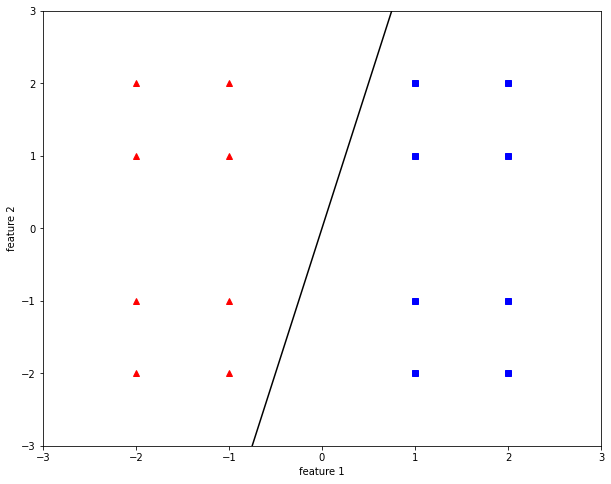

In [15]:
num_epochs = 100
weight_init = np.array([-1.0, -0.75])

fit(X1, y, weight_init, num_epochs)


In [17]:
# 2 

import torch.nn as nn

# initialising the model

def init_weights(m):
        if type(m) == nn.Linear:
            m.weight = torch.nn.Parameter(torch.from_numpy(w))
            
net = nn.Sequential(nn.Linear(2, 1,bias=False), nn.Sigmoid())
    
net.apply(init_weights)

# defining the loss function
    
loss = nn.BCELoss(reduction='none')
    
# defining the optimisation algorithm
    
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)
    
print('weights before backpropagation = ', list(net.parameters()))
    
print('\n')

def sgd_train(X, y):
    
    X = torch.from_numpy(X)
    y = torch.from_numpy(y).reshape(16,1)
    
    X = X.double()
    y = y.double()
    
    # since the required batch size is 1 (ie. the whole dataset is used at every epoch), we do not need to refer to the data_iter() function
    for epoch in range(100):
        output = net(X)
        l = loss(output , y)
        optimizer.zero_grad()
        l.sum().backward()
        optimizer.step()
        
    X = X.numpy().reshape(16,2)
    y = y.numpy().reshape(16)
    
    return 'weights after backpropagation = ', list(net.parameters())

sgd_train(X1, y)
 


weights before backpropagation =  [Parameter containing:
tensor([[-1.0000, -0.7500]], dtype=torch.float64, requires_grad=True)]




('weights after backpropagation = ',
 [Parameter containing:
  tensor([[ 3.0823e+01, -1.2015e-05]], dtype=torch.float64, requires_grad=True)])

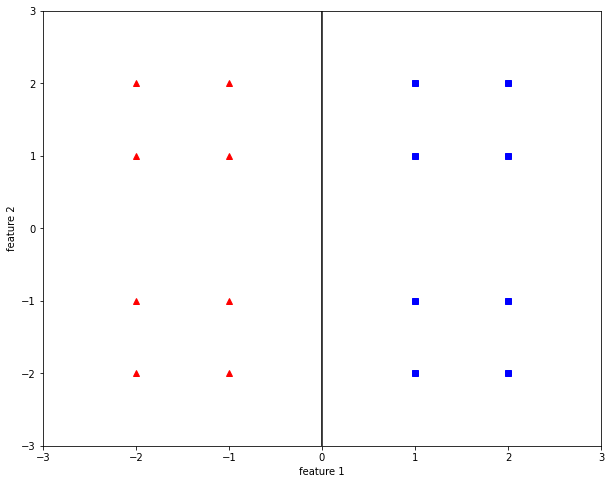

In [1048]:
final_weights1 = np.array([3.0823e+01,  -1.2015e-05])
plot_decision_boundary(X1, y, final_weights1.reshape(1,2))

In [18]:
### Given the following dataset and plotting function

X2 = np.array([[-0.25, 1], [1, 2],[2,1],[2,2],[-1,1],[-1,2],[-2,1],[-2,2],
              [1, -1], [1, -2],[2,-1],[2,-2],[-1,-1],[-1,-2],[-2,-1],[-2,-2]])
y = np.array([1,1,1,1,-1,-1,-1,-1,
              1,1,1,1,-1,-1,-1,-1])
w = np.array([[-1.0, -0.75]])


('final weights: [3.   1.25]', 'final classification accuracy: 0.03125', None)

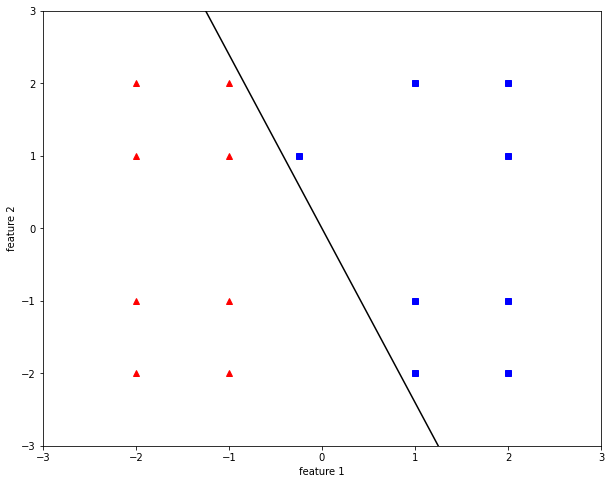

In [19]:
#4

# Running the perceptron algorithm on the new dataset

fit(X2, y, weight_init, num_epochs)


We can see that the decision boundary has significantly changed after changing one point in our dataset. This implies that our model based on the perceptron algorithm has very high variance. As we can see, the  linear classifier is highly sensitive to small changes in the dataset. Since the point has affected the slope of our decision boundary, it can be see as a high leverage point. The new point can be seen to be closer to the decision boundary line.

With regards to the classification accuracy, we can see that it remains the same for the two datasets.

In [20]:
# Running the sgd algorithm on the new dataset

sgd_train(X2, y)


('weights after backpropagation = ',
 [Parameter containing:
  tensor([[32.8140,  2.1560]], dtype=torch.float64, requires_grad=True)])

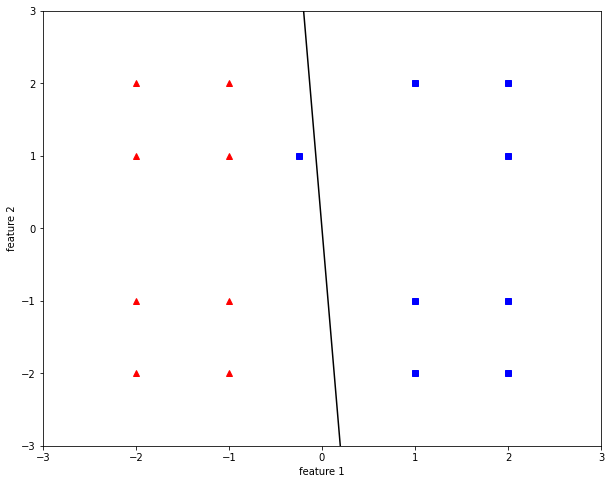

In [21]:
final_weights2 = np.array([32.8140,  2.1560])
plot_decision_boundary(X2, y, final_weights2.reshape(1,2)) 

We can see that the decision boundary has changed very little after changing one point in our dataset (we can see it has become a bit flatter). This implies that our model based on stochastic gradient descending has low variance and is robust to small changes in the data. However, we can see that the new point (-0.25, 1) replacing (1,1) is now misclassified, leading to a lower classification accuracy.